# **EDA on FIFA Football Data** 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

# 1.Data Loading and Exploration

In [3]:
df = pd.read_csv('../data/fifa data.csv')

In [4]:
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [5]:
pd.set_option('display.max_columns', None)

- Lets find the number of records and variables in the dataset

In [6]:
df.shape

(18278, 104)

- Now ,we will view the name of all variables of the dataset

In [7]:
for col in df.columns:
    print(col)

sofifa_id
player_url
short_name
long_name
age
dob
height_cm
weight_kg
nationality
club
overall
potential
value_eur
wage_eur
player_positions
preferred_foot
international_reputation
weak_foot
skill_moves
work_rate
body_type
real_face
release_clause_eur
player_tags
team_position
team_jersey_number
loaned_from
joined
contract_valid_until
nation_position
nation_jersey_number
pace
shooting
passing
dribbling
defending
physic
gk_diving
gk_handling
gk_kicking
gk_reflexes
gk_speed
gk_positioning
player_traits
attacking_crossing
attacking_finishing
attacking_heading_accuracy
attacking_short_passing
attacking_volleys
skill_dribbling
skill_curve
skill_fk_accuracy
skill_long_passing
skill_ball_control
movement_acceleration
movement_sprint_speed
movement_agility
movement_reactions
movement_balance
power_shot_power
power_jumping
power_stamina
power_strength
power_long_shots
mentality_aggression
mentality_interceptions
mentality_positioning
mentality_vision
mentality_penalties
mentality_composure
defe

- How many players are there in particular country? 
- I will use nationality column as it is categorical column and that's why it will give frequency count of each category 

In [8]:
df['nationality'].value_counts()

nationality
England        1667
Germany        1216
Spain          1035
France          984
Argentina       886
               ... 
Malawi            1
Gibraltar         1
Macau             1
South Sudan       1
Indonesia         1
Name: count, Length: 162, dtype: int64

- Lets view the top 10 country with maximum no. of players 

- nationalities column is useful as it shows frequency of a value with index 


<Axes: ylabel='nationality'>

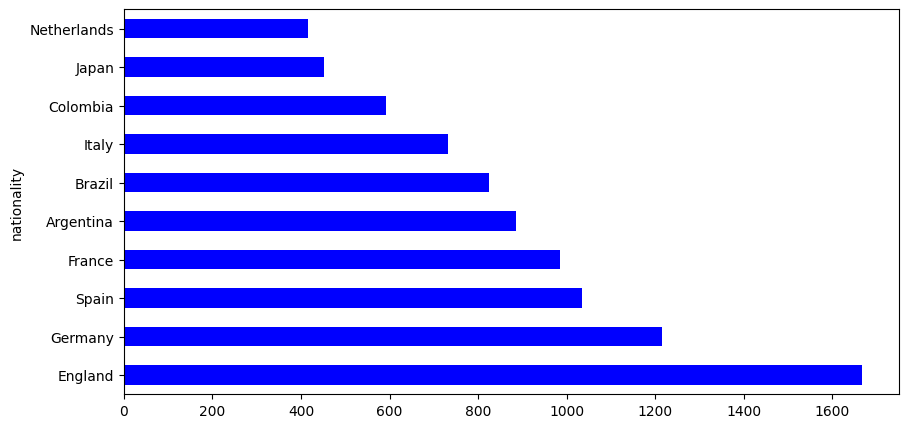

In [9]:
df['nationality'].value_counts()[0:10].plot(kind='barh', figsize=(10, 5), color='blue')

- Lets see the top 5 nationalities which has maximum players


<Axes: ylabel='nationality'>

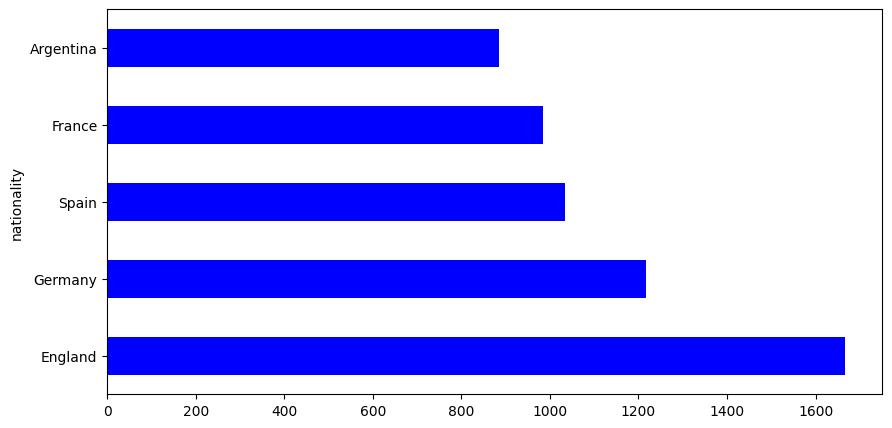

In [10]:
df['nationality'].value_counts()[0:5].plot(kind='barh', figsize=(10, 5), color='blue')

- Lets extract the names of top 5 countries with maximum number of players with keys method 

In [11]:
df['nationality'].value_counts().keys()[0:5]

Index(['England', 'Germany', 'Spain', 'France', 'Argentina'], dtype='object', name='nationality')

- Create barplot of top 5 countries to understand more better through plot 

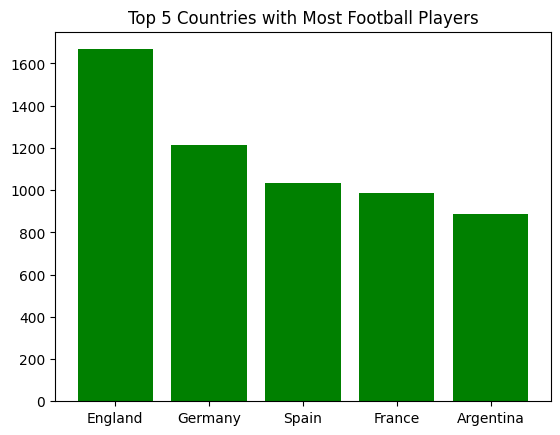

In [12]:
plt.Figure(figsize=(8, 5))
plt.bar(df['nationality'].value_counts().keys()[0:5], df['nationality'].value_counts()[0:5],color='g')
plt.title('Top 5 Countries with Most Football Players') 
plt.show()

- Lets extract two columns (short_name + wage_euro) to make new dataframe with name (Salary) 

In [13]:
Player_Salary = df[['short_name','wage_eur']]

- Lets see the first 5 records of the player salary dataframe 

In [14]:
Player_Salary.head() 

,short_name,wage_eur
0,L. Messi,565000
1,Cristiano Ronaldo,405000
2,Neymar Jr,290000
3,J. Oblak,125000
4,E. Hazard,470000


---
# 2.Top 5 Players Salary 

- Lets Customize the sub-dataframe 

In [15]:
Player_Salary=Player_Salary.sort_values(by='wage_eur',ascending=False)

- Find the top 5 players with highest salary 

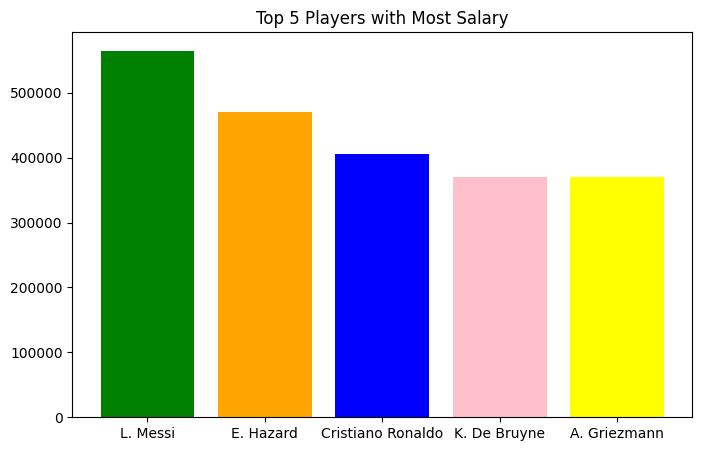

In [16]:
plt.figure(figsize=(8, 5))
plt.bar(Player_Salary['short_name'][0:5], Player_Salary['wage_eur'][0:5],color=['g','orange','blue','pink','yellow'])
plt.title('Top 5 Players with Most Salary') 
plt.show()

---
# 3.Germany Players Salary 

- Lets find how many players belong to germany and make a new dataframe 


In [17]:
Germany = df[df['nationality']=='Germany']
Germany.head(10)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
6,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,27,1992-04-30,187,85,Germany,FC Barcelona,90,93,67500000,250000,GK,Right,3,4,1,Medium/Medium,Normal,Yes,143400000.0,NaN,GK,1.0,NaN,2014-07-01,2022.0,SUB,22.0,NaN,NaN,NaN,NaN,NaN,NaN,88.0,85.0,88.0,90.0,45.0,88.0,"Swerve Pass, Acrobatic Clearance, Flair Passes",18,14,11,61,14,21,18,12,63,30,38,50,37,86,43,66,79,35,78,10,43,22,11,70,25,70,25,13,10,88,85,88,88,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,33,1986-03-27,193,92,Germany,FC Bayern München,88,88,32000000,155000,GK,Right,5,4,1,Medium/Medium,Normal,Yes,52800000.0,NaN,GK,1.0,NaN,2011-07-01,2021.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,87.0,91.0,87.0,57.0,85.0,"Power Free-Kick, Flair, Swerve Pass, Acrobatic...",15,13,25,55,11,30,14,11,59,46,54,60,51,84,35,68,77,43,80,16,29,30,12,70,47,70,17,10,11,87,87,91,85,87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,182521,https://sofifa.com/player/182521/toni-kroos/20...,T. Kroos,Toni Kroos,29,1990-01-04,183,76,Germany,Real Madrid,88,88,57000000,330000,CM,Right,4,5,3,Medium/Medium,Normal,Yes,116900000.0,"#Playmaker , #Crosser, #Complete Midfielder",LCM,8.0,NaN,2014-07-17,2023.0,SUB,8.0,45.0,80.0,90.0,81.0,70.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,"Argues with Officials, Finesse Shot, Crowd Fav...",88,75,58,91,82,80,86,84,92,89,50,41,60,87,71,87,30,74,73,86,60,76,75,89,73,88,72,70,62,10,11,13,7,10,75+3,75+3,75+3,78+3,79+3,79+3,79+3,78+3,81+3,81+3,81+3,79+3,85+3,85+3,85+3,79+3,75+3,79+3,79+3,79+3,75+3,72+3,69+3,69+3,69+3,72+3
37,188350,https://sofifa.com/player/188350/marco-reus/20...,M. Reus,Marco Reus,30,1989-05-31,180,71,Germany,Borussia Dortmund,88,88,56000000,170000,"CAM, LM, ST",Right,4,4,4,High/Medium,Lean,Yes,92400000.0,"#Dribbler, #Playmaker , #Distance Shooter, #F...",CAM,11.0,NaN,2012-07-01,2023.0,ST,11.0,85.0,88.0,84.0,87.0,45.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Avoids Using Weaker Foot, Bea...",82,87,49,86,90,87,89,86,77,88,85,85,86,87,84,88,71,76,67,87,51,48,89,86,90,85,49,37,45,12,12,13,13,11,82+3,82+3,82+3,86+3,86+3,86+3,86+3,86+3,86+3,86+3,86+3,85+3,80+3,80+3,80+3,85+3,69+3,65+3,65+3,65+3,69+3,64+3,55+3,55+3,55+3,64+3
49,178603,https://sofifa.com/player/178603/mats-hummels/...,M. Hummels,Mats Hummels,30,1988-12-16,191,94,Germany,Borussia Dortmund,87,87,41000000,130000,CB,Right,4,3,3,High/Medium,Normal,Yes,67700000.0,"#Tackling , #Tactician",LCB,15.0,NaN,2019-07-01,2022.0,NaN,NaN,51.0,58.0,76.0,72.0,89.0,76.0,NaN,NaN,NaN,NaN,NaN,NaN,"Avoids Using Weaker Foot, Leadership, Finesse ...",6

- Let find the top 5 tallest players in Germany

In [18]:
Germany.sort_values(by='height_cm',ascending=False).head() 

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
8016,236831,https://sofifa.com/player/236831/aaron-seydel/...,A. Seydel,Aaron Seydel,23,1996-02-07,199,90,Germany,1. FSV Mainz 05,67,73,1100000,9000,"ST, LM",Left,1,4,3,Medium/Low,Normal,No,2000000.0,NaN,SUB,36.0,NaN,2016-11-27,2021.0,NaN,NaN,68.0,64.0,53.0,66.0,29.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Crowd Favourite",59,68,69,58,59,69,43,31,35,72,67,69,53,58,34,66,63,51,78,56,55,19,63,59,55,68,25,28,22,12,9,14,11,9,66+2,66+2,66+2,64+2,65+2,65+2,65+2,64+2,62+2,62+2,62+2,62+2,54+2,54+2,54+2,62+2,46+2,43+2,43+2,43+2,46+2,44+2,43+2,43+2,43+2,44+2
1389,199833,https://sofifa.com/player/199833/lars-unnersta...,L. Unnerstall,Lars Unnerstall,28,1990-07-20,198,103,Germany,PSV,76,78,6500000,14000,GK,Right,1,1,1,Medium/Medium,Stocky,No,9600000.0,NaN,SUB,13.0,NaN,2018-07-01,2021.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.0,75.0,72.0,77.0,33.0,74.0,NaN,10,13,10,26,15,16,13,11,24,19,28,37,19,72,20,54,40,35,82,12,36,21,13,42,16,58,11,17,15,76,75,72,74,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1217,200212,https://sofifa.com/player/200212/michael-esser...,M. Esser,Michael Esser,31,1987-11-22,198,97,Germany,Hannover 96,77,77,5500000,23000,GK,Right,1,3,1,Medium/Medium,Normal,Yes,8800000.0,NaN,SUB,23.0,NaN,2017-07-01,2020.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.0,74.0,64.0,82.0,41.0,75.0,Flair,10,8,25,39,9,15,14,17,35,17,32,48,30,72,28,48,67,37,82,19,40,30,6,48,23,53,20,15,16,77,74,64,75,82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16184,240218,https://sofifa.com/player/240218/alexander-wei...,A. Weidinger,Alexander Weidinger,22,1997-06-18,197,88,Germany,SSV Jahn Regensburg,58,66,140000,1000,GK,Right,1,2,1,Medium/Medium,Normal,No,245000.0,NaN,SUB,32.0,NaN,2017-07-29,2022.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.0,57.0,60.0,54.0,23.0,60.0,NaN,13,7,10,23,8,11,13,12,23,18,22,23,29,50,38,45,54,21,60,6,22,12,6,24,10,25,14,13,11,58,57,60,60,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11859,167437,https://sofifa.com/player/167437/dominik-stroh...,D. Stroh-Engel,Dominik Stroh-Engel,33,1985-11-27,197,94,Germany,SpVgg Unterhaching,64,64,280000,2000,ST,Right,1,3,2,Medium/Medium,Normal,No,406000.0,#Strength,SUB,7.0,NaN,2019-08-01,2021.0,NaN,NaN,37.0,64.0,47.0,52.0,35.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,Long Passer (CPU AI Only),31,64,73,57,58,51,55,52,42,60,35,39,34,64,31,71,34,31,91,53,66,29,65,46,76,68,21,43,23,15,15,13,11,13,62+2,62+2,62+2,51+2,57+2,57+2,57+2,51+2,53+2,53+2,53+2,50+2,50+2,50+2,50+2,50+2,39+2,45+2,45+2,45+2,39+2,39+2,47+2,47+2,47+2,39+2


- Let know the top 5 highest paid player in germany using wage_eur column 

In [19]:
Germany.sort_values(by='wage_eur',ascending=False).head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
36,182521,https://sofifa.com/player/182521/toni-kroos/20...,T. Kroos,Toni Kroos,29,1990-01-04,183,76,Germany,Real Madrid,88,88,57000000,330000,CM,Right,4,5,3,Medium/Medium,Normal,Yes,116900000.0,"#Playmaker , #Crosser, #Complete Midfielder",LCM,8.0,NaN,2014-07-17,2023.0,SUB,8.0,45.0,80.0,90.0,81.0,70.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,"Argues with Officials, Finesse Shot, Crowd Fav...",88,75,58,91,82,80,86,84,92,89,50,41,60,87,71,87,30,74,73,86,60,76,75,89,73,88,72,70,62,10,11,13,7,10,75+3,75+3,75+3,78+3,79+3,79+3,79+3,78+3,81+3,81+3,81+3,79+3,85+3,85+3,85+3,79+3,75+3,79+3,79+3,79+3,75+3,72+3,69+3,69+3,69+3,72+3
6,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,27,1992-04-30,187,85,Germany,FC Barcelona,90,93,67500000,250000,GK,Right,3,4,1,Medium/Medium,Normal,Yes,143400000.0,NaN,GK,1.0,NaN,2014-07-01,2022.0,SUB,22.0,NaN,NaN,NaN,NaN,NaN,NaN,88.0,85.0,88.0,90.0,45.0,88.0,"Swerve Pass, Acrobatic Clearance, Flair Passes",18,14,11,61,14,21,18,12,63,30,38,50,37,86,43,66,79,35,78,10,43,22,11,70,25,70,25,13,10,88,85,88,88,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,222492,https://sofifa.com/player/222492/leroy-sane/20...,L. Sané,Leroy Sané,23,1996-01-11,183,75,Germany,Manchester City,86,92,61000000,195000,LW,Left,2,3,4,High/Medium,Lean,Yes,125100000.0,"#Speedster, #Dribbler, #Acrobat",SUB,19.0,NaN,2016-08-02,2021.0,LW,19.0,95.0,81.0,79.0,86.0,38.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Early Crosser",83,81,72,80,85,88,83,82,64,85,93,96,86,81,80,87,64,78,70,78,61,34,84,82,71,80,36,32,35,8,12,9,9,14,82+2,82+2,82+2,84+2,84+2,84+2,84+2,84+2,83+2,83+2,83+2,83+2,74+2,74+2,74+2,83+2,65+2,59+2,59+2,59+2,65+2,61+2,52+2,52+2,52+2,61+2
146,186942,https://sofifa.com/player/186942/ilkay-gundoga...,I. Gündoğan,İlkay Gündoğan,28,1990-10-24,180,80,Germany,Manchester City,84,84,31000000,180000,"CM, CDM",Right,3,4,4,High/Medium,Normal,Yes,57400000.0,#Playmaker,SUB,8.0,NaN,2016-07-01,2023.0,LCM,21.0,66.0,74.0,84.0,84.0,72.0,71.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Selfish, Finesse Shot, Crowd ...",78,71,50,88,75,84,85,74,85,88,67,66,77,85,77,77,61,71,73,74,70,77,78,86,76,87,75,74,67,11,14,5,5,13,74+3,74+3,74+3,79+3,79+3,79+3,79+3,79+3,82+3,82+3,82+3,80+3,83+3,83+3,83+3,80+3,76+3,79+3,79+3,79+3,76+3,74+3,72+3,72+3,72+3,74+3
70,189596,https://sofifa.com/player/189596/thomas-muller...,T. Müller,Thomas Müller,29,1989-09-13,186,75,Germany,FC Bayern München,86,86,43500000,170000,"CAM, RM, RW",Right,4,4,3,High/High,Lean,Yes,71800000.0,"#Engine, #Clinical Finisher",SUB,25.0,NaN,2008-08-10,2021.0,NaN,NaN,72.0,83.0,79.0,78.0,55.0,71.0,NaN,NaN,NaN,NaN,NaN,NaN,"Diver, Speed Dribbler (CPU AI Only)",79,87

In [20]:
Germany[['short_name','wage_eur']].sort_values(by='wage_eur',ascending=False).head()

,short_name,wage_eur
36,T. Kroos,330000
6,M. ter Stegen,250000
55,L. Sané,195000
146,I. Gündoğan,180000
70,T. Müller,170000


---
# 4.Players Shootings 

In [21]:
# make new column (player_shootin) with two columns data(short_name and shooting)
player_shooting = df[['short_name','shooting']] 

<Axes: xlabel='short_name'>

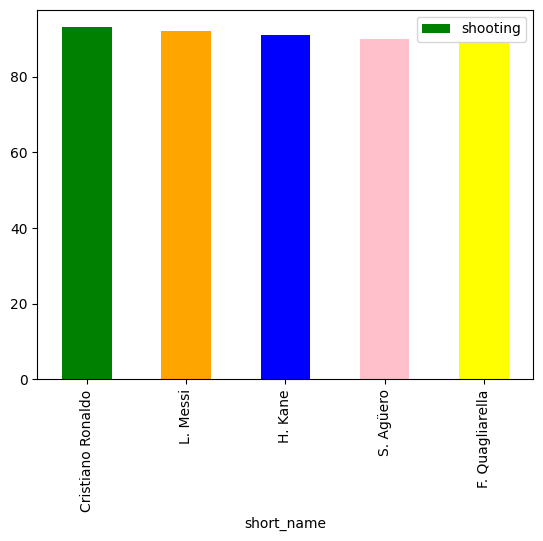

In [22]:
player_shooting.sort_values(by='shooting',ascending=False).head().plot.bar(x='short_name',y='shooting',color=['g','orange','blue','pink','yellow'])

---
# 6.Players defending

In [23]:
df.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=104)

In [24]:
player_defending = df[['short_name','defending','nationality','club']]

In [25]:
player_defending.sort_values(by='defending',ascending=False).head()

,short_name,defending,nationality,club
7,V. van Dijk,90.0,Netherlands,Liverpool
16,G. Chiellini,90.0,Italy,Juventus
49,M. Hummels,89.0,Germany,Borussia Dortmund
11,K. Koulibaly,89.0,Senegal,Napoli
35,D. Godín,89.0,Uruguay,Inter
